# Multiple Inputs usage

Example created by Wilson Rocha Lacerda Junior

## Generating 2 input 1 output sample data


The data is generated by simulating the following model:

$y_k = 0.4y_{k-1}^2 + 0.1y_{k-1}x1_{k-1} + 0.6x2_{k-1} -0.3x1_{k-1}x2_{k-2} + e_{k}$

If *colored_noise* is set to True:

$e_{k} = 0.8\nu_{k-1} + \nu_{k}$

where $x$ is a uniformly distributed random variable and $\nu$ is a gaussian distributed variable with $\mu=0$ and $\sigma=0.001$


In [ ]:
# pip install sysidentpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation
from sysidentpy.utils.generate_data import get_miso_data, get_siso_data

In [2]:
x_train, x_valid, y_train, y_valid = get_miso_data(
    n=1000,
    colored_noise=False,
    sigma=0.001,
    train_percentage=90
    )

In [3]:
x_valid

array([[ 0.84718773,  0.64782619],
       [-0.6463614 , -0.06938097],
       [-0.3279628 ,  0.08040468],
       [-0.44832705,  0.62772717],
       [-0.7355006 ,  0.82629467],
       [-0.59522501, -0.35149138],
       [-0.66836524,  0.60184433],
       [ 0.2224252 ,  0.62637123],
       [ 0.3284271 , -0.44356695],
       [ 0.46456191,  0.96903361],
       [-0.12298052,  0.3873254 ],
       [-0.98498169,  0.44026343],
       [ 0.5911376 , -0.46118481],
       [ 0.10780418, -0.30273877],
       [-0.47515793,  0.08684273],
       [ 0.71816079,  0.99707024],
       [-0.87412469,  0.44077344],
       [-0.35389164,  0.92808403],
       [ 0.14286785,  0.44623933],
       [ 0.51886802,  0.4133657 ],
       [-0.71063375,  0.45282756],
       [-0.05888259,  0.70386672],
       [-0.13184965, -0.0647267 ],
       [ 0.92263881, -0.93005236],
       [ 0.28416995, -0.61052148],
       [ 0.64109054,  0.99021817],
       [ 0.42932828, -0.55147958],
       [-0.94213595, -0.15882816],
       [-0.8691726 ,

There is a specific difference for multiple input data.

- You have to pass the lags for each input in a nested list (*e.g., [[1, 2], [1, 2]]*)

The remainder settings remains the same.

## Build the model

In [4]:
basis_function = Polynomial(degree=2)

model = FROLS(
    order_selection=True,
    n_terms=4,
    extended_least_squares=False,
    ylag=2, xlag=[[1, 2], [1, 2]],
    info_criteria='aic',
    estimator='least_squares',
    basis_function=basis_function
)

/Users/arturo.melendez/Documents/Quetzal/sysidentpy/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)


In [5]:
model.fit(X=x_train, y=y_train)

## Model evaluation

0.0028198547866522196
       Regressors   Parameters             ERR
0         x2(k-1)   5.9995E-01  9.09918793E-01
1  x2(k-2)x1(k-1)  -2.9968E-01  4.81697719E-02
2        y(k-1)^2   3.9988E-01  4.15822976E-02
3   x1(k-1)y(k-1)   9.9307E-02  3.21207059E-04


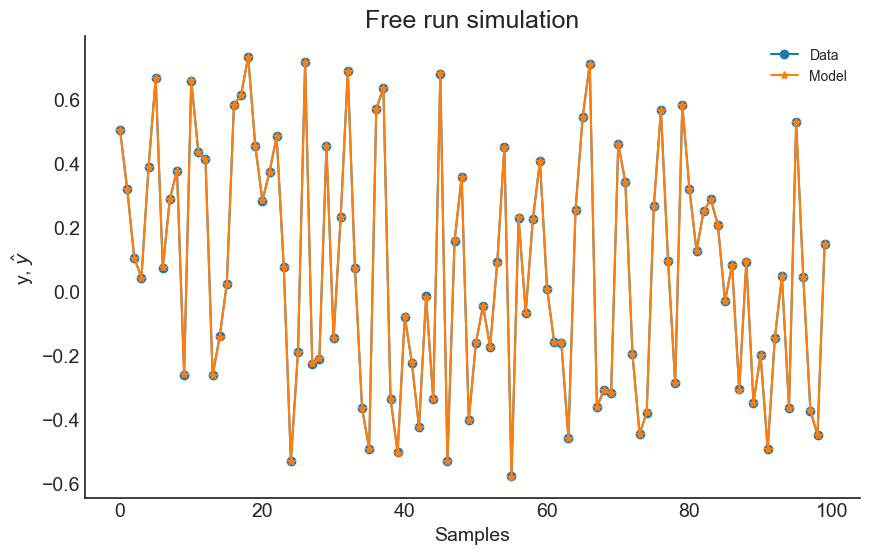

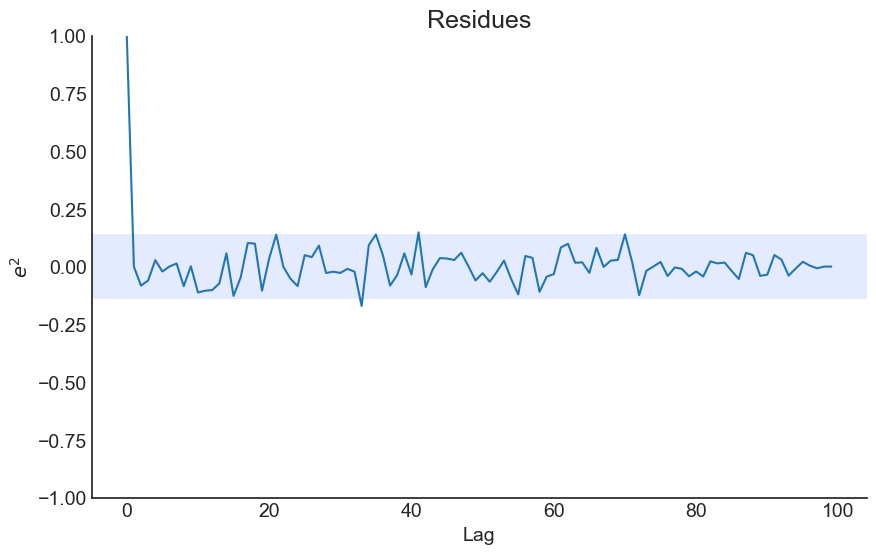

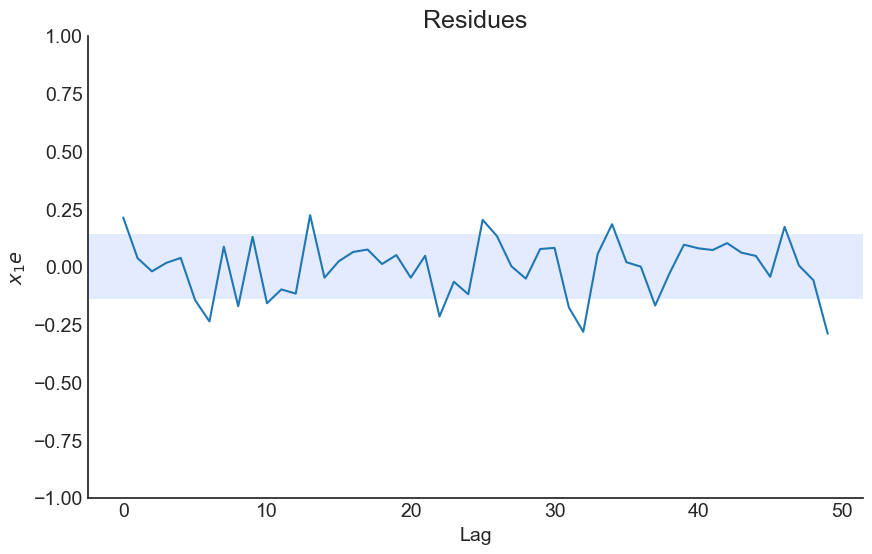

In [6]:
yhat = model.predict(X=x_valid, y=y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)
plot_results(y=y_valid, yhat = yhat, n=1000)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid[:, 0])
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

Text(0, 0.5, 'Information Criteria')

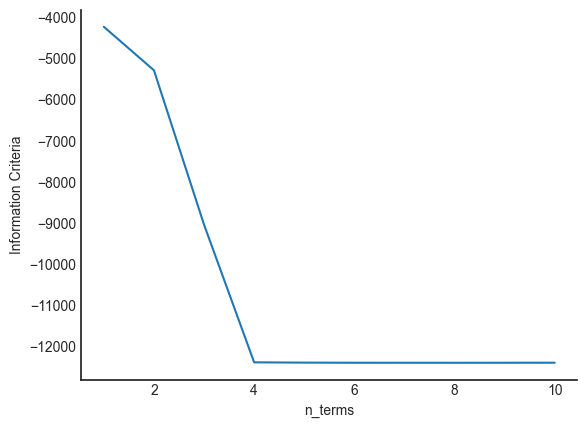

In [7]:
xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')